In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # K: 배수, Fold: 유효성 검증을 위해 하나를 접었다 의 의미
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # support vector machine
from sklearn.metrics import accuracy_score

In [2]:
# Load the data
mush = pd.read_csv('./mushrooms.csv', encoding='utf-8')
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [34]:
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [36]:
mush['odor'].unique()

array(['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'], dtype=object)

In [3]:
mush.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [4]:
mush.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
for i in mush.columns:
    print(i,mush[i].unique())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [6]:
mush1=mush.copy()

In [7]:
def label_encoding(df):
    le=LabelEncoder()
    for i in df.columns:
        df[i]=le.fit_transform(df[i])
    return df

In [8]:
label_encoding(mush1)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [9]:
mush1.drop(columns = 'veil-type', inplace=True)

In [10]:
mush1

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


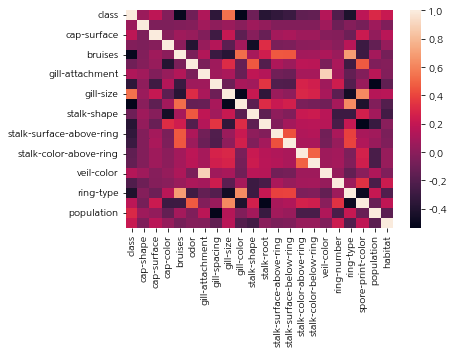

In [11]:
sns.heatmap(mush1.corr())

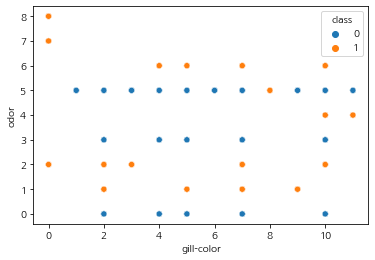

In [12]:
sns.scatterplot(x='gill-color',hue='class',y='odor',data=mush1)

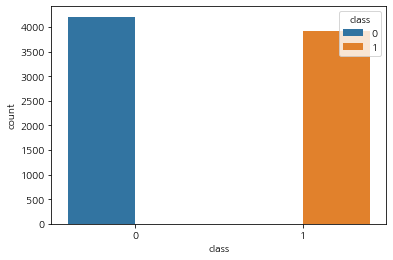

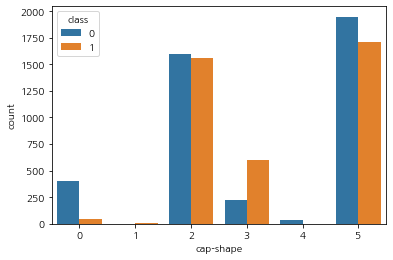

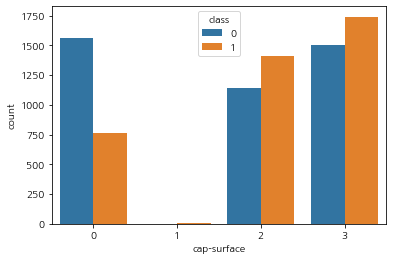

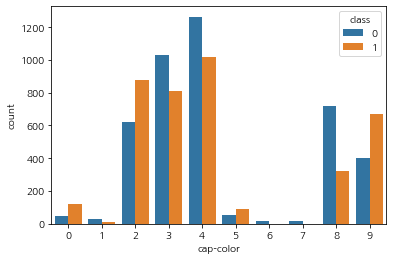

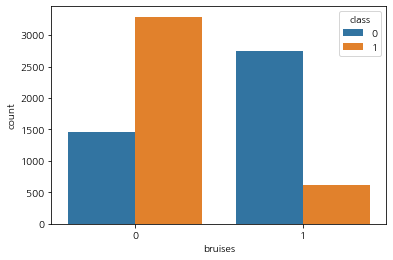

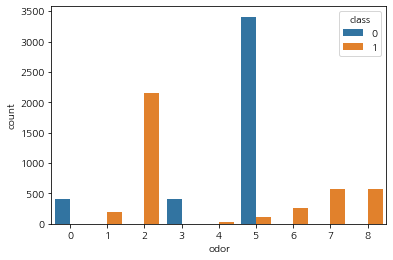

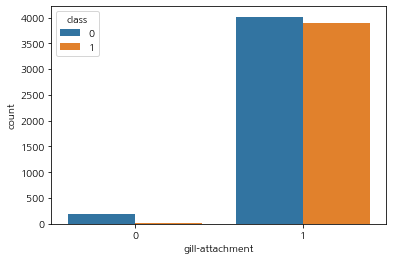

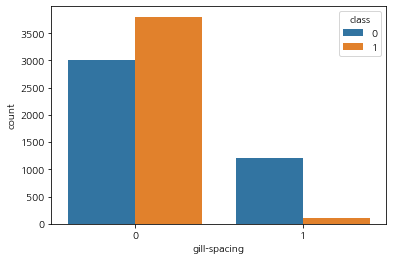

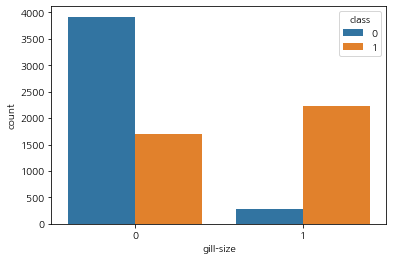

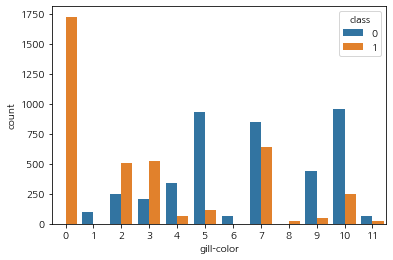

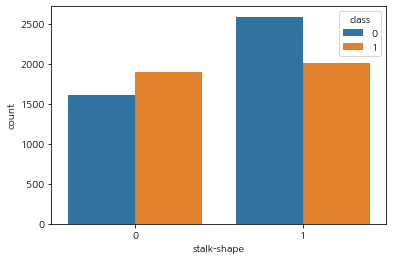

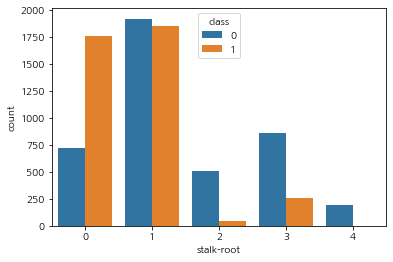

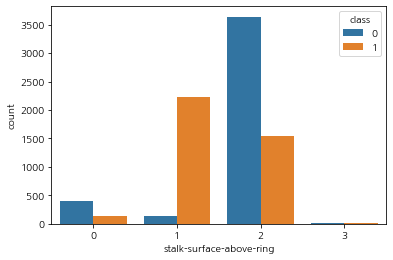

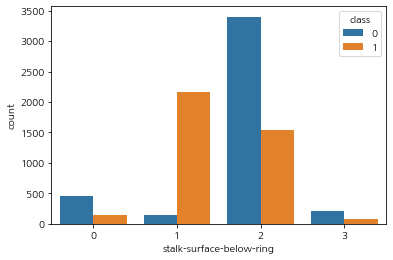

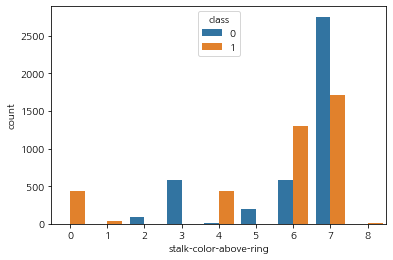

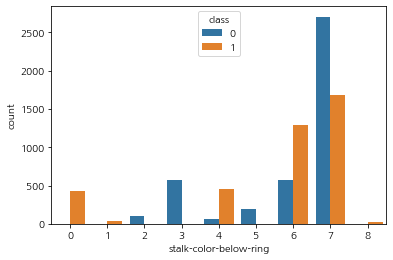

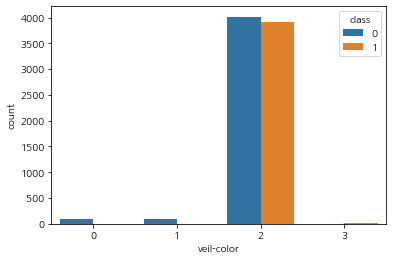

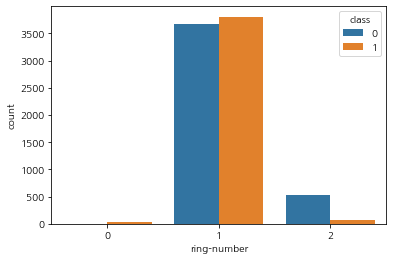

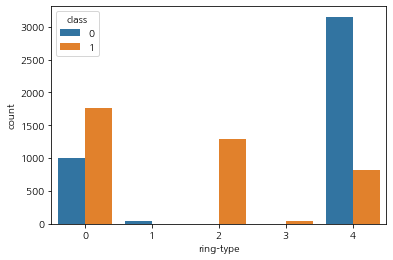

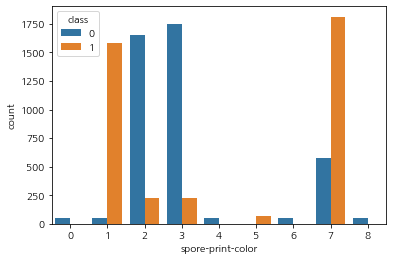

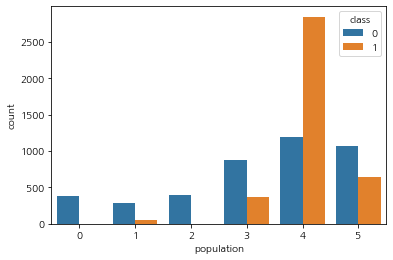

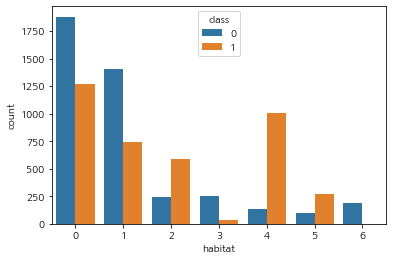

In [13]:
# mush1에 대해 class를 가지고 column이 1개씩 반복되면서 x축에 들어가지고 countplot이 1개씩 그려진다
for i in mush1.columns:
    plt.figure()
    sns.countplot(x=i,hue='class',data=mush1)

In [14]:
len(mush1.columns)

22

In [15]:
# train_test data split
data = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat']
X_train, X_test, Y_train, Y_test = train_test_split(
            mush1[data], # problem
            mush1['class'], # answer
            test_size = 0.2, # test-size rate
            random_state = 50 # seed value
)

In [16]:
X_train.shape

(6499, 21)

In [17]:
X_test.shape

(1625, 21)

In [18]:
Y_train.shape

(6499,)

In [19]:
Y_test.shape

(1625,)

In [20]:
df_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
svc_clf = SVC()
clf_list = [df_clf, rf_clf, svc_clf]

In [21]:
# train data 3가지 방법으로 훈련데이터 훈련시켜서 정확도 비교
for clf in clf_list:
    clf.fit(X_train, Y_train)
    pred = clf.predict(X_test)
    print("accuracy >> {0:4f}".format(accuracy_score(Y_test, pred)))

accuracy >> 1.000000
accuracy >> 1.000000
accuracy >> 0.987692


In [22]:
mush1[data].index

RangeIndex(start=0, stop=8124, step=1)

In [23]:
def crossvar_kfold(k):
    clf_list = [df_clf, rf_clf, svc_clf]
    acc_list = []
    avg_acc = []
    for clf in clf_list:
        acc_list = []
        kfold = KFold(n_splits=k)
        for i, (train_index, test_index) in enumerate(kfold.split(mush1[data])):
            X_train2, X_test2 = mush1[data].values[train_index], mush1[data].values[test_index]
            Y_train2, Y_test2 = mush1['class'].values[train_index], mush1['class'].values[test_index]

            clf.fit(X_train2, Y_train2)
            pred2 = clf.predict(X_test2)
            acc = accuracy_score(Y_test2, pred2)
            acc_list.append(acc)
        avg_acc.append(np.mean(acc_list))
        print("average accuracy >> {0: .2f}".format(np.mean(acc_list)))
        
    clf_list = ['의사결정나무', '랜덤포레스트', '서포트벡터머신']
    if avg_acc[0] > avg_acc[1] and avg_acc[0] > avg_acc[2]:
        print('제일 정확도가 높은 모델은', clf_list[0],'이고 정확도는', round(avg_acc[0] * 100), '입니다')
    elif avg_acc[1] > avg_acc[2]:
        print('제일 정확도가 높은 모델은', clf_list[1],'이고 정확도는', round(avg_acc[1] * 100), '입니다')
    else:
        print('제일 정확도가 높은 모델은', clf_list[2],'이고 정확도는', round(avg_acc[2] * 100), '입니다')

In [24]:
crossvar_kfold(10)

average accuracy >>  1.00
average accuracy >>  1.00
average accuracy >>  0.98
제일 정확도가 높은 모델은 랜덤포레스트 이고 정확도는 100 입니다


In [25]:
df_clf.feature_importances_

array([0.        , 0.        , 0.        , 0.03413168, 0.0043886 ,
       0.        , 0.        , 0.13945459, 0.31429926, 0.02782206,
       0.03495915, 0.        , 0.00215956, 0.00794176, 0.00107916,
       0.        , 0.00514199, 0.        , 0.24342917, 0.1686309 ,
       0.01656212])

In [26]:
rf_clf.feature_importances_

array([0.00486495, 0.00976514, 0.01013093, 0.06688535, 0.19741407,
       0.000887  , 0.03252052, 0.09530971, 0.11827548, 0.02332543,
       0.07770136, 0.05154862, 0.02823172, 0.01486283, 0.01052399,
       0.00170813, 0.00940504, 0.01892808, 0.15704178, 0.04056086,
       0.030109  ])

In [27]:
importances = pd.Series(rf_clf.feature_importances_, X_train.columns)

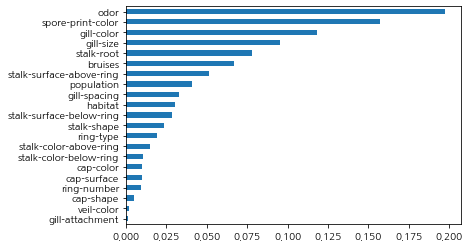

In [28]:
importances.sort_values().plot.barh()

In [29]:
from sklearn.tree import export_graphviz
import graphviz

In [30]:
mush1['class'].unique()

array([1, 0])

In [31]:
mush1['class'] = mush1['class'].astype(str)

In [32]:
export_graphviz(df_clf, # 공부한 내용
            out_file = "mushroom.dot", # 저장할 파일 이름
            feature_names = data, # 공부한 컬럼
            class_names = mush1['class'].unique(), # 타겟 컬럼.unique() --> 0,1
            rounded=True, # 보여지는 모습 (둥글게, 네모나게)
            filled=True  # 색깔
            )

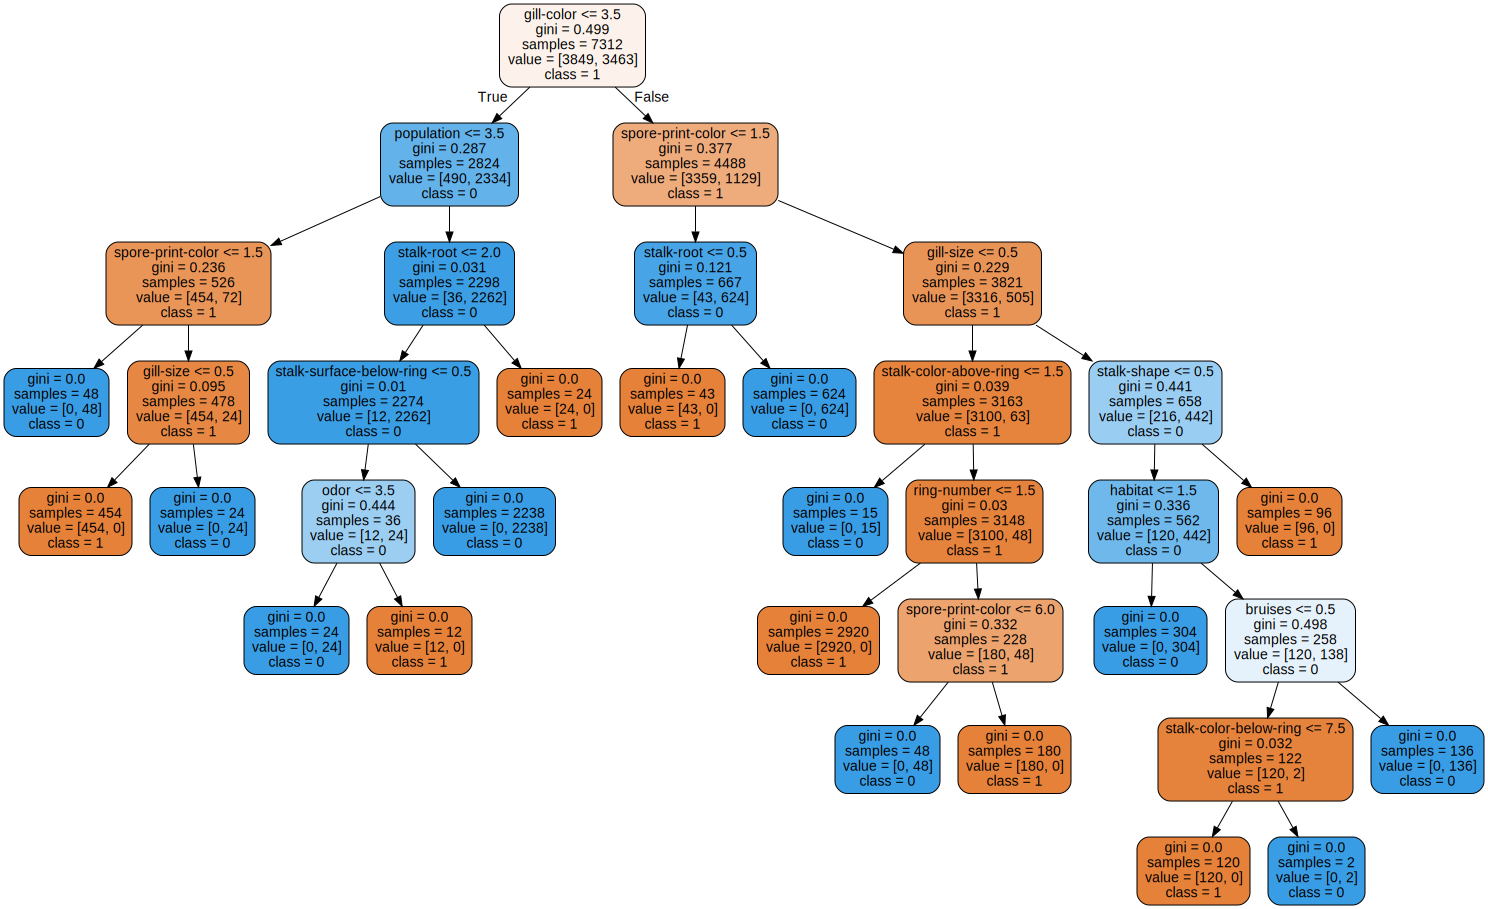

In [33]:
with open("mushroom.dot") as f2:
    dot_graph2 = f2.read() # 읽어왔을 경우: dot_graph2 ==> 텍스트 형태
    
dot2 = graphviz.Source(dot_graph2)
dot2.format = 'png' # dot2를 저장할 포맷 설정
dot2.render(filename='mushroom', directory='.', cleanup=True) # . : 현재 위치
dot2